In [1]:
import pandas as pd
df = pd.read_csv('combined_filtered_genres.csv')

In [2]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
data = df['user score']
skew_value = skew(data)
kurt_value = kurtosis(data)

print(f"Skewness: {skew_value:.2f}")
print(f"Kurtosis: {kurt_value:.2f}")

Skewness: -1.21
Kurtosis: 2.21


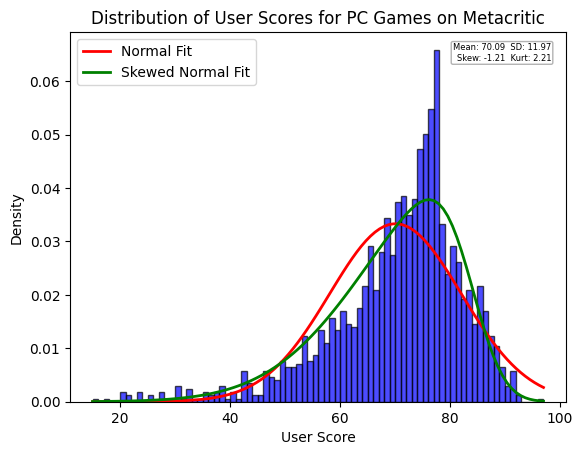

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, skew, kurtosis

# Get the data
data = df['user score']

# Fit the distributions
params_normal = norm.fit(data)
params_skewed = skewnorm.fit(data)

# Generate x-values for plotting
x_vals = np.linspace(min(data), max(data), 100)

# Calculate the PDF for the distributions
y_vals_normal = norm.pdf(x_vals, *params_normal)
y_vals_skewed = skewnorm.pdf(x_vals, *params_skewed)

# Compute statistical metrics
mean = np.mean(data)
std_dev = np.std(data)
data_skewness = skew(data)
data_kurtosis = kurtosis(data)

# Plot the histogram
bins = np.arange(min(data), max(data) + 1, 1)  # Adjust bin width to 1
plt.hist(data, bins=bins, alpha=0.7, color='blue', edgecolor='black', density=True)

# Plot the normal and skewed normal fits
plt.plot(x_vals, y_vals_normal, color='red', label="Normal Fit", linewidth=2)
plt.plot(x_vals, y_vals_skewed, color='green', label="Skewed Normal Fit", linewidth=2)

# Add statistical annotations (smaller text and box)
stats_text = f"Mean: {mean:.2f}  SD: {std_dev:.2f}\nSkew: {data_skewness:.2f}  Kurt: {data_kurtosis:.2f}"
plt.annotate(stats_text, xy=(0.97, 0.97), xycoords='axes fraction',
             fontsize=6, ha='right', va='top', 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round,pad=0.2'))

# Labels and title
plt.xlabel("User Score")
plt.ylabel("Density")
plt.title("Distribution of User Scores for PC Games on Metacritic")
plt.legend()

# Save the plot
plt.savefig('Graphs/histogram_with_skewed_normal_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [161]:
# Calculate the log-likelihood for normal distribution
log_likelihood_normal = np.sum(np.log(norm.pdf(data, *params_normal)))
# Calculate the log-likelihood for skewed normal distribution
log_likelihood_skewed = np.sum(np.log(skewnorm.pdf(data, *params_skewed)))

# Number of parameters for each distribution
k_normal = 2  # Normal distribution has 2 parameters (mean, std)
k_skewed = 3  # Skewed normal distribution has 3 parameters (mean, std, skew)

# Calculate AIC for both models
AIC_normal = 2 * k_normal - 2 * log_likelihood_normal
AIC_skewed = 2 * k_skewed - 2 * log_likelihood_skewed

# Print log-likelihood and AIC for comparison
print(f"Normal Log-Likelihood: {log_likelihood_normal:.2f}")
print(f"Skewed Normal Log-Likelihood: {log_likelihood_skewed:.2f}")
print(f"Normal AIC: {AIC_normal:.2f}")
print(f"Skewed Normal AIC: {AIC_skewed:.2f}")

# The model with the lower AIC is the better fit
if AIC_normal < AIC_skewed:
    print("Normal distribution fits the data better (lower AIC).")
else:
    print("Skewed normal distribution fits the data better (lower AIC).")

Normal Log-Likelihood: -6691.47
Skewed Normal Log-Likelihood: -6533.09
Normal AIC: 13386.95
Skewed Normal AIC: 13072.19
Skewed normal distribution fits the data better (lower AIC).


In [162]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import linregress

# # Extract X and Y values
# x = df['score']
# y = df['user score']*10

# # Calculate linear regression
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# # Generate fitted line
# x_fit = np.linspace(min(x), max(x), 100)
# y_fit = slope * x_fit + intercept

# # Scatter plot
# plt.scatter(x, y, alpha=0.5, label="Data Points")

# # Line of best fit
# plt.plot(x_fit, y_fit, color="red", label=f"Best Fit: y = {slope:.2f}x + {intercept:.2f}")

# # Correlation coefficient
# plt.text(min(x), max(y), f"Correlation: r = {r_value:.2f}", fontsize=12, color="blue")

# # Labels and title
# plt.xlabel("Critics Rating")
# plt.ylabel("User Rating")
# plt.title("User Rating vs Critics Rating on Metacritic")


# plt.legend()
# plt.show()

# # Print regression equation
# print(f"Equation of best fit: y = {slope:.2f}x + {intercept:.2f}")
# print(f"Correlation coefficient (r): {r_value:.2f}")

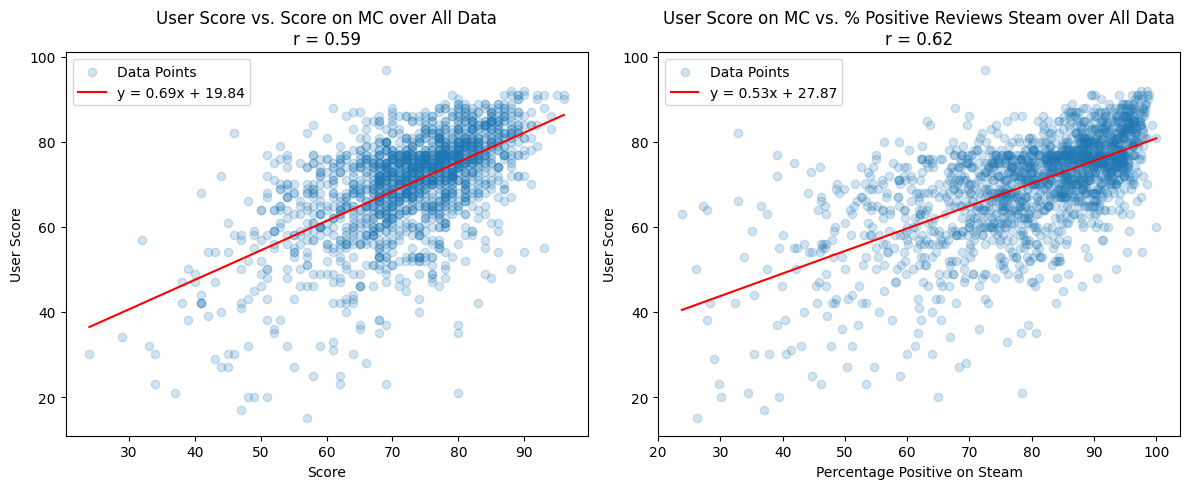

Equation 1: y = 0.69x + 19.84, r = 0.59
Equation 2: y = 0.53x + 27.87, r = 0.62


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def user_vs_critics(df, df_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    x1 = df['score']
    y1 = df['user score']
    slope1, intercept1, r_value1, _, _ = linregress(x1, y1)
    x_fit1 = np.linspace(min(x1), max(x1), 100)
    y_fit1 = slope1 * x_fit1 + intercept1

    axes[0].scatter(x1, y1, alpha=0.2, label="Data Points")
    axes[0].plot(x_fit1, y_fit1, color="red", label=f"y = {slope1:.2f}x + {intercept1:.2f}")
    axes[0].set_xlabel("Score")
    axes[0].set_ylabel("User Score")
    axes[0].set_title(f"User Score vs. Score on MC over {df_name}\nr = {r_value1:.2f}")
    axes[0].legend()

    # Scatter Plot 2: user_score vs. percentage_positive
    x2 = df['percent_positive_steam']*100
    y2 = df['user score']
    slope2, intercept2, r_value2, _, _ = linregress(x2, y2)
    x_fit2 = np.linspace(min(x2), max(x2), 100)
    y_fit2 = slope2 * x_fit2 + intercept2

    axes[1].scatter(x2, y2, alpha=0.2, label="Data Points")
    axes[1].plot(x_fit2, y_fit2, color="red", label=f"y = {slope2:.2f}x + {intercept2:.2f}")
    axes[1].set_xlabel("Percentage Positive on Steam")
    axes[1].set_ylabel("User Score")
    axes[1].set_title(f"User Score on MC vs. % Positive Reviews Steam over {df_name}\nr = {r_value2:.2f}")
    axes[1].legend()
    filename = f"{df_name}_user_vs_score.png"
    plt.savefig(f"Graphs/{filename}", dpi=300, bbox_inches="tight")

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Print equations and correlation values
    print(f"Equation 1: y = {slope1:.2f}x + {intercept1:.2f}, r = {r_value1:.2f}")
    print(f"Equation 2: y = {slope2:.2f}x + {intercept2:.2f}, r = {r_value2:.2f}")
    return None

user_vs_critics(df, 'All Data')

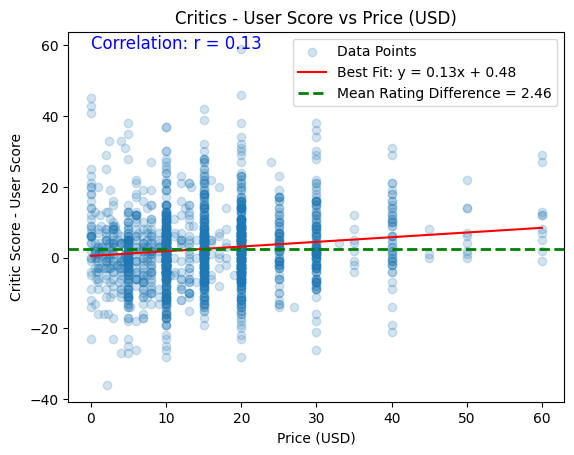

Equation of best fit: y = 0.13x + 0.48
Correlation coefficient (r): 0.13


In [14]:
x = df['price']
y = df['score'] - df['user score']

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Generate fitted line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
y_mean = np.mean(y)

# Scatter plot
plt.scatter(x, y, alpha=0.2, label="Data Points")


# Line of best fit
plt.plot(x_fit, y_fit, color="red", label=f"Best Fit: y = {slope:.2f}x + {intercept:.2f}")
# Correlation coefficient
plt.text(min(x), max(y), f"Correlation: r = {r_value:.2f}", fontsize=12, color="blue")
plt.axhline(y_mean, color="green", linestyle="dashed", linewidth=2, label=f"Mean Rating Difference = {y_mean:.2f}")

# Labels and title
plt.xlabel("Price (USD)")
plt.ylabel("Critic Score - User Score")
plt.title("Critics - User Score vs Price (USD)")
plt.legend()
plt.savefig("user_vs_critics.png", dpi=300, bbox_inches="tight")

plt.show()

# Print regression equation
print(f"Equation of best fit: y = {slope:.2f}x + {intercept:.2f}")
print(f"Correlation coefficient (r): {r_value:.2f}")

In [165]:
import scipy.stats as stats
import numpy as np

def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

# Assuming df is your DataFrame with 'price', 'user_score', and 'score'
def pearson_fisher(df):
    price = df['price']
    user_score = df['user score']
    score = df['score']

    corr_price_user, p_value_user = stats.pearsonr(price, user_score)
    print(f"Pearson correlation between price and user score: {corr_price_user:.3f}, p-value: {p_value_user}")

    corr_price_score, p_value_score = stats.pearsonr(price, score)
    print(f"Pearson correlation between price and critic score: {corr_price_score:.3f}, p-value: {p_value_score}")
    z_user = fisher_z(corr_price_user)
    z_score = fisher_z(corr_price_score)

    # Standard error of the difference in Z-scores
    n = len(df)  # Number of observations (make sure the same number for both)
    se = np.sqrt((1 / (n - 3)) + (1 / (n - 3)))

    # Z-test for difference in correlations
    z_diff = (z_user - z_score) / se
    p_value_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))  # two-tailed test

    print(f"Z-score for the difference in correlations: {z_diff}")
    print(f"P-value for the difference in correlations: {p_value_diff}")
    return ([corr_price_user, p_value_user, corr_price_score, p_value_score], z_diff, p_value_diff)

In [166]:
hyp_test_all = pearson_fisher(df)

Pearson correlation between price and user score: 0.023, p-value: 0.3395184598696745
Pearson correlation between price and critic score: 0.157, p-value: 6.603622352545326e-11
Z-score for the difference in correlations: -3.950585118657337
P-value for the difference in correlations: 7.796036507268234e-05


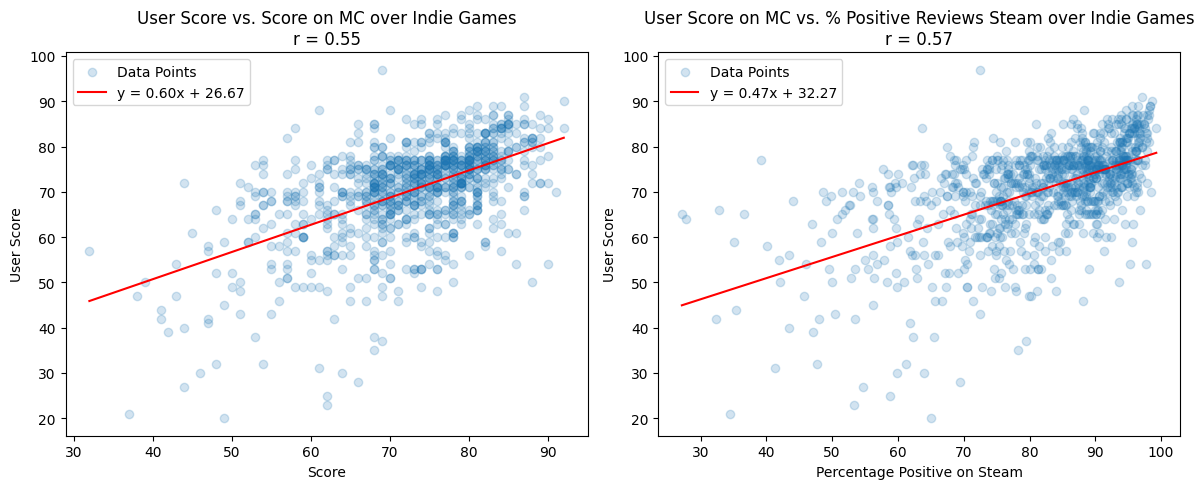

Equation 1: y = 0.60x + 26.67, r = 0.55
Equation 2: y = 0.47x + 32.27, r = 0.57


In [167]:
# Rename the 'combined_genres' column to 'genre'
df.rename(columns={'Combined_Genres': 'genre'}, inplace=True)

# Split the DataFrame into two: one with genres containing 'Indie' and one without
df_indie = df[df['genre'].str.contains('Indie', case=False, na=False)]
df_non_indie = df[~df['genre'].str.contains('Indie', case=False, na=False)]

user_vs_critics(df_indie, 'Indie Games')
# Display the two DataFrames
# print("Indie Genre DataFrame:")
# print(df_indie.head())
# print("\nNon-Indie Genre DataFrame:")
# print(df_non_indie.head())

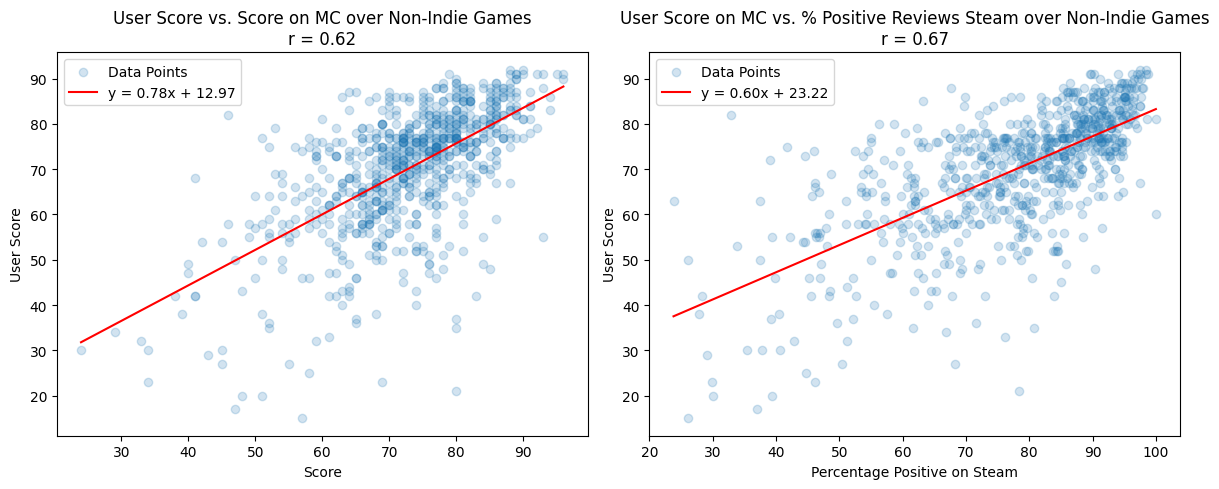

Equation 1: y = 0.78x + 12.97, r = 0.62
Equation 2: y = 0.60x + 23.22, r = 0.67


In [168]:
user_vs_critics(df_non_indie, 'Non-Indie Games')

In [169]:
hyp_test_indie = pearson_fisher(df_indie)

Pearson correlation between price and user score: 0.025, p-value: 0.43890422892273234
Pearson correlation between price and critic score: 0.142, p-value: 1.1473065434310763e-05
Z-score for the difference in correlations: -2.5595348173730206
P-value for the difference in correlations: 0.01048123561627623


In [170]:
hyp_test_non_indie = pearson_fisher(df_non_indie)

Pearson correlation between price and user score: 0.023, p-value: 0.5271728812669885
Pearson correlation between price and critic score: 0.171, p-value: 2.0955007464221803e-06
Z-score for the difference in correlations: -2.914700366963601
P-value for the difference in correlations: 0.00356030183977607


In [172]:
#print(hyp_test_non_indie)